In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

bankdata = pd.read_csv("/Users/sofielysenko/Desktop/18&20_1NTB_POS&NEG.csv") # Reading the data in with pandas
#df1 = pd.read_csv("/Users/sofielysenko/images.csv")

In [29]:
bankdata.shape # rows, columns

(2472, 3)

In [30]:
bankdata.head() # see what data looks like

,x,y,Emotion
0,435.14224,270.55704,Positive
1,435.15585,270.54865,Positive
2,435.16605,270.54300,Positive
3,435.15833,270.53366,Positive
4,435.13710,270.53568,Positive


In [ ]:
#Convert to a pickle file 
bankdata.to_pickle('normalized_all_keypoints.pickle')

In [ ]:
#Data Preprocessing
#(1) Divide the data into attributes and labels
#(2) Divide the data into training and testing sets

In [ ]:
df = bankdata.loc[:,'Image'].values

In [ ]:
import csv
csvfile = "labels.csv"   
with open(csvfile, "a") as fp:
    wr = csv.writer(fp, dialect='excel')
    res=[]
    
    for a in df1:
        res.append(a)
        wr.writerow(res)

In [ ]:
df = bankdata.loc[:,'y_keypoint'].values

In [ ]:
df

In [ ]:
import csv
csvfile = "Pnew1.csv"   
with open(csvfile, "a") as fp:
    wr = csv.writer(fp, dialect='excel')
    res=[]
    count_ele=0
    for a in df:
        res.append(a)
        count_ele+=1
        if count_ele > 63:
            wr.writerow(res)
            count_ele=0
            res=[]

#test68y_1 and test68x_1 are the two used

In [ ]:
   
res=[]
for a in df:
    res.append(a)
    
from collections import OrderedDict
res1 = list(OrderedDict.fromkeys(res))

import csv
csvfile = "labels1.csv"   
with open(csvfile, "a") as fp:
    wr = csv.writer(fp, dialect='excel')
    wr.writerow(res1)
    res=[]


In [31]:
X = bankdata.drop('Emotion', axis=1)# removing the Class column bc that is labels
y = bankdata['Emotion'] # only Class column

In [32]:
X = bankdata.drop('Emotion', axis=1)# removing the Class column bc that is labels
y = bankdata['Emotion'] # only Class column

In [33]:
from sklearn.model_selection import train_test_split  # split into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0, stratify=y)  


In [34]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,
                                                    y, test_size=0.33)

ImportError: cannot import name 'cross_validation' from 'sklearn' (/Users/sofielysenko/anaconda3/lib/python3.7/site-packages/sklearn/__init__.py)

In [35]:
from sklearn.model_selection import RepeatedKFold 

kf = RepeatedKFold(n_splits=70, n_repeats=50, random_state=None) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [   0    1    2 ... 2469 2470 2471] Validation: [  44  196  352  401  546  590  683  696  888  889 1118 1139 1208 1225
 1253 1296 1305 1341 1387 1451 1699 1752 1755 1756 1784 1785 1848 1895
 1989 2157 2226 2235 2247 2339 2404 2454]


KeyError: '[   0    1    2 ... 2469 2470 2471] not in index'

In [ ]:
#Training the Algo

from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)  

In [ ]:
# Making Predictions
y_pred = svclassifier.predict(X_test)  

In [ ]:
#Evaluating the Algo
#Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

In [ ]:
#Implementing Kernel SVM with Scikit-Learn

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

bankdata = pd.read_csv("/Users/sofielysenko/FSPCA.csv") # Reading the data in with pandas

In [36]:
X = bankdata.drop('Emotion', axis=1) # removing the Class column bc that is labels
y = bankdata['Emotion'] # only Class column

In [37]:
#Train Test Split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)  

In [38]:
#1. Polynomial Kernel

from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree=10)  
svclassifier.fit(X_train, y_train)  

#Making predictions
y_pred = svclassifier.predict(X_test)  

#Evaluate 
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[  0 406]
 [  0 410]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       406
    Positive       0.50      1.00      0.67       410

   micro avg       0.50      0.50      0.50       816
   macro avg       0.25      0.50      0.33       816
weighted avg       0.25      0.50      0.34       816



/Users/sofielysenko/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sofielysenko/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
#2. Gaussian Kernel
#(different setup)
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

#Prediction (same)
y_pred = svclassifier.predict(X_test)  

#Evaluate (same)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[406   0]
 [  0 410]]
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       406
    Positive       1.00      1.00      1.00       410

   micro avg       1.00      1.00      1.00       816
   macro avg       1.00      1.00      1.00       816
weighted avg       1.00      1.00      1.00       816



/Users/sofielysenko/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
#3. Sigmoid Kernel
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train)  

y_pred = svclassifier.predict(X_test)  

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

/Users/sofielysenko/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[   0  383    0]
 [   0 2548    0]
 [   0  432    0]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       383
     Neutral       0.76      1.00      0.86      2548
    Positive       0.00      0.00      0.00       432

   micro avg       0.76      0.76      0.76      3363
   macro avg       0.25      0.33      0.29      3363
weighted avg       0.57      0.76      0.65      3363



/Users/sofielysenko/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems. However, in our case we had three output classes

# Amongst the Gaussian kernel and polynomial kernel, we can see that Gaussian kernel achieved a perfect 100% prediction rate while polynomial kernel misclassified one instance. Therefore the Gaussian kernel performed slightly better. However, there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset.

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4], [1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


bankdata = pd.read_csv("/Users/sofielysenko/Desktop/18_1NTB_POS.csv") # Reading the data in with pandas
bankdata1 = pd.read_csv("/Users/sofielysenko/Desktop/20_1NTB_NEG.csv") # Reading the data in with pandas
bankdata2 = pd.read_csv("/Users/sofielysenko/Desktop/18_1NTB_NEU.csv") # Reading the data in with pandas



plt.plot(bankdata['x'],bankdata['y'], 'yo', label = 'Positive')
plt.legend()
plt.plot(bankdata1['x'],bankdata1['y'], 'bo', label = 'Negative')
plt.legend()
plt.plot(bankdata2['x'],bankdata2['y'], 'go', label = 'Neutral')
plt.legend()
plt.title('Infant 18/20 Session 1 NTB', fontsize = 15)

plt.ylabel('y centroid')
plt.xlabel('x centroid')
plt.show()

plt.show()

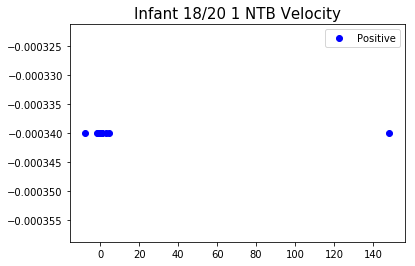

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


bankdata = pd.read_csv("/Users/sofielysenko/Desktop/v_both_neg.csv") # Reading the data in with pandas
bankdata1 = pd.read_csv("/Users/sofielysenko/Desktop/v_both_pos.csv") # Reading the data in with pandas
#bankdata2 = pd.read_csv("/Users/sofielysenko/Desktop/18_1NTB_NEU.csv") # Reading the data in with pandas


offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData


# plt.plot(bankdata['x'], bankdata['y'], 'yo', label = 'Negative')
# plt.legend()
plt.plot(bankdata1['x'], bankdata1['y'], 'bo', label = 'Positive')
plt.legend()
plt.title('Infant 18/20 1 NTB Velocity', fontsize = 15)

#plt.ylabel('y centroid')
#plt.xlabel('x centroid')
plt.show()

plt.show()

In [ ]:
import matplotlib.pyplot as plt  #plotting cross validation and emotion paramaters



#mean curvature of eyes_top v. curvature of mouth_top

plt.plot([-0.00806411,
-0.01589476,
-0.01160663,
-0.01025176,
-0.00311819,
-0.00311819,
-0.01160663,
-0.01025176,
-0.00311819,
-0.01342401,
-0.00908403,
-0.01770433,
-0.00675553,
-0.00494765,
-0.00463582,
-0.0084853,
-0.01111215,
-0.01383382,
-0.01378833,
-0.00742621,
-0.01065938,
-0.01170681,
-0.01170681,
-0.00968592,
-0.00479239,
-0.01053609,
-0.01676623,
-0.00649448,
-0.04080943,
-0.01543992,
-0.00734975,
-0.0101308,
-0.01101356,
-0.01205509,
-0.01656136,
-0.01324697,
-0.00848422,
-0.01089667,
-0.0067849,
-0.01067126,
-0.02367693,
-0.00886555,
-0.0215474,
-0.02224071,
-0.02224071,
-0.0042364,
-0.00368749,
-0.00368749,
-0.01282005,
-0.01327951,
-0.0110624,
-0.0117359,
-0.00724189,
-0.01134828,
-0.01935585,
-0.00958579,
-0.00985592,
-0.01638157,
-0.00764207,
-0.00764207,
-0.06870794], [-0.006518755,
-0.008877615,
-0.00761043,
-0.00824203,
-0.00674816,
-0.00674816,
-0.00761043,
-0.00824203,
-0.00674816,
-0.001993585,
-0.00858066,
-0.009377765,
-0.00280986,
-0.009249925,
-0.00035805,
-0.001266414772,
-0.014741315,
-0.011204745,
-0.006600885,
-0.00419438,
-0.006411365,
-0.00878944,
-0.00878944,
-0.00773097,
-0.010713985,
-0.003269275,
-0.008438265,
-0.00900733,
-0.016694445,
-0.0080187,
-0.005314275,
-0.00925217,
-0.004141405,
-0.01187232,
-0.007665355,
-0.00942107,
-0.004023245,
-0.005430415,
-0.00682665,
-0.00827142,
-0.009423155,
-0.005675285,
-0.011282435,
-0.01351077,
-0.01351077,
-0.00843225,
-0.00746669,
-0.00746669,
-0.00486183,
-0.01017229,
-0.00377968,
-0.004918515,
-0.007296505,
-0.00551844,
-0.006274305,
-0.00197358,
-0.01148569,
-0.004669195,
-0.01005287,
-0.01005287,
-0.06666667,

], "yo", label = "Positive") #Positive
plt.legend()

plt.plot([-0.00632528,
-0.01054894,
-0.01054894,
-0.01054894,
-0.01054894,
-0.01210659,
-0.01210659,
-0.00920739,
-0.00390145,
-0.01050513,
-0.0103832,
-0.01209897,
-0.01209897,
-0.0161115,
-0.0161115,
-0.00764177,
-0.01514055,
-0.00950656,
-0.01000238,
-0.01000238,
-0.00737922,
-0.00673623,
-0.00673623,
-0.01477629,
-0.00087657,
-0.00087657,
-0.01451691,
-0.01451691,
-0.00868048,
-0.00196974,
-0.00726705,
-0.02149493,
-0.00569533,
-0.00394741,
-0.03413358,
-0.01490169,
-0.00659931,
-0.00761598,
-0.01379964,
-0.00224749,
-0.00266443,
-0.01733787,
-0.00911591,
-0.0073498,
-0.01425589,
-0.01536487,
-0.01113472,
-0.00589383,
-0.00968274], [-0.007562615,
-0.00668079,
-0.00668079,
-0.00668079,
-0.00668079,
-0.00258631,
-0.00258631,
0.001263959811,
-0.003569145,
-0.002406855,
-0.00257888,
-0.00388262,
-0.00388262,
-0.00905484,
-0.00905484,
-0.004097115,
-0.00300311,
-0.009022355,
-0.00332557,
-0.00332557,
-0.006944945,
-0.00637214,
-0.00637214,
-0.011252155,
-0.00647785,
-0.00647785,
-0.00342047,
-0.00342047,
-0.005677565,
-0.004601335,
-0.00258945,
-0.01083616,
-0.0145334,
-0.002535885,
-0.03618197,
-0.002529885,
-0.00531771,
-0.0029355,
-0.00365497,
-0.01050821,
-0.008622125,
-0.00654587,
-0.001391485,
3.15E-04,
0.0026387,
-0.00437962,
0.00036859,
-0.008451715,
-0.000477675],"bo", label= 'Negative') #Negative
plt.legend()

plt.plot([-0.0090756,
-0.00735513,
-0.01974855,
-0.01347077,
-0.00998419,
-0.00389741,
-0.0195448,
-0.05693324,
-0.0066998,
-0.0126551,
-0.00720337,
-0.00720337,
-0.00658918,
-0.00924476,
-0.01398233,
-0.00524069,
-0.01619646,
-0.02141228,
-0.01269043,
-0.00617308,
-0.0128979,
-0.01256407,
-0.02038972,
-0.00615366,
-0.01318539,
-0.01689665,
-0.00289739,
-0.01394908,
-0.00711871,
-0.00727892,
-0.00251227,
-0.02010163,
-0.00775365,
-0.00735879,
-0.00699078,
-0.00703828], [-0.01346618,
-0.00909097,
-0.04674755,
-0.010857525,
-0.01695174,
-0.010727625,
-0.015819455,
-0.0459596,
-0.011195145,
-0.015553535,
-0.0098414,
-0.0098414,
-0.008742785,
-0.0182225,
-0.01125608,
-0.011157715,
-0.0131913,
-0.02028265,
-0.0117589,
-0.01003293,
-0.015322425,
-0.011171765,
-0.01797139,
-0.01074623,
-0.01311073,
-0.02705113,
-0.014152505,
-0.013876535,
-0.014175015,
-0.011316025,
-0.020318135,
-0.014774325,
-0.008984615,
-0.01370141,
-0.005908525,
-0.01240508],"ro", label= 'Neutral') #Neutral
 #Neutral
plt.legend()

plt.ylabel('mean curvature of eyes_top')
plt.xlabel('curvature of mouth_top')
plt.show()

In [ ]:
import matplotlib.pyplot as plt  #plotting cross validation and emotion paramaters



#mean curvature of eyes_bottom v. curvature of mouth_bottom

plt.plot([-0.00053172,
0.00179896,
-0.00082625,
0.00163851,
0.00554361,
0.00554361,
-0.00082625,
0.00163851,
0.00554361,
0.00714897,
0.00112689,
0.01096554,
0.00068501,
0.00031863,
0.00436679,
0.00316389,
0.00280791,
0.00740591,
0.00181211,
0.00425187,
0.00258992,
0.00716907,
0.00716907,
0.00239199,
0.00076099,
0.0080315,
0.00444299,
0.00029762,
0.01693755,
0.00181862,
0.0044141,
0.00235529,
0.00315402,
0.00259624,
0.00325328,
0.00160456,
0.00983083,
0.00391261,
0.00545945,
-0.00027151,
0.01007778,
0.00910477,
0.00262512,
0.00909874,
0.00909874,
0.00286524,
0.00231539,
0.00231539,
0.0071696,
0.00365748,
0.00623947,
0.00400905,
0.00403155,
0.00385098,
0.01026872,
0.00340949,
0.00214095,
0.01193692,
0.00409735,
0.00409735,
0.06443319], [0.01651621,
0.00888925,
0.01219278,
0.02247927,
0.01235369,
0.01235369,
0.01219278,
0.02247927,
0.01235369,
0.01227882,
0.01719957,
0.02955061,
0.01024655,
0.01526611,
0.02113394,
0.00753002,
0.02125608,
0.02737288,
0.01647447,
0.00825593,
0.00976881,
0.01949738,
0.01949738,
0.01990381,
0.02273756,
0.01891317,
0.01888252,
0.01418944,
0.03686995,
0.01546764,
0.00532303,
0.01916671,
0.01851596,
0.02282631,
0.02179928,
0.02100884,
0.00976369,
0.0106125,
0.01907229,
0.02216865,
0.02968961,
0.02164486,
0.02187902,
0.02102634,
0.02102634,
0.01648939,
0.02287401,
0.02287401,
0.02581778,
0.0147891,
0.01141587,
0.01653191,
0.01989948,
0.01388858,
0.01531977,
0.01025967,
0.01448538,
0.01995541,
0.02475113,
0.02475113,
0.14545455

], "yo", label = "Positive") #Positive
plt.legend()

plt.plot([0.0035199,
0.00019925,
0.00019925,
0.00019925,
0.00019925,
0.00563954,
0.00563954,
0.02133023,
0.00200668,
0.0112916,
0.00874845,
0.00094073,
0.00094073,
0.00441194,
0.00441194,
0.01159923,
0.01100213,
0.01093919,
0.01273862,
0.01273862,
0.00099057,
0.00335781,
0.00335781,
0.00684592,
0.00761256,
0.00761256,
0.00201115,
0.00201115,
0.00260739,
0.00357567,
0.00231731,
0.00238486,
0.00906441,
0.01161257,
0.02371649,
0.00883959,
0.0035829,
0.00190015,
0.00557099,
0.00878245,
0.01091829,
0.01499047,
0.00422495,
0.00562965,
0.01646773,
0.00813067,
0.00877985,
0.01025773,
0.00710254], [0.01348223,
0.01166671,
0.01166671,
0.01166671,
0.01166671,
0.011252,
0.011252,
0.0151846,
0.008199,
0.01180907,
0.00767813,
0.00010742,
0.00010742,
0.01281387,
0.01281387,
0.01184374,
0.01624843,
0.01722167,
0.02053789,
0.02053789,
0.01675299,
0.00261429,
0.00261429,
0.00985207,
0.0088177,
0.0088177,
0.01183881,
0.01183881,
0.01268062,
0.01246038,
0.00746359,
0.00058814,
0.01482486,
0.01972628,
0.03875902,
0.01256725,
0.01307099,
0.00738714,
0.0025283,
0.0131696,
0.01478015,
0.02454557,
0.01065764,
0.00769822,
0.01248309,
0.00453726,
0.00759232,
0.03311376,
0.00533788],"bo", label= 'Negative') #Negative
plt.legend()

plt.plot([0.00637062,
0.00669765,
-0.00370307,
0.00565143,
0.00807923,
0.00528394,
0.01857916,
0.07073232,
0.00445179,
0.0124948,
0.00728046,
0.00728046,
0.00737986,
0.01575797,
0.01545709,
0.00601889,
0.01376219,
0.01699376,
0.0089542,
0.01276097,
0.00595578,
0.01751791,
0.01055092,
0.01075988,
0.0134648,
0.01340894,
0.01433224,
0.00866604,
0.00084594,
0.01010863,
0.01003,
0.02045,
0.00906746,
0.00881333,
0.00521356,
0.00955752], [0.01440924,
0.01105455,
0.06085067,
0.01877255,
0.01386357,
0.01533985,
0.02228057,
0.15929973,
0.01535981,
0.02166354,
0.01796548,
0.01796548,
0.02000368,
0.02321055,
0.01704064,
0.01980853,
0.02166573,
0.0393901,
0.02082907,
0.01509436,
0.02046781,
0.02297852,
0.03226986,
0.01363604,
0.01952442,
0.03156138,
0.03001645,
0.02290594,
0.02087034,
0.02135233,
0.02161374,
0.02650036,
0.01698329,
0.01740446,
0.02232833,
0.0224823],"ro", label= 'Neutral') #Neutral
 #Neutral
plt.legend()    
plt.ylabel('mean curvature of eyes_bottom')
plt.xlabel('curvature of mouth_bottom')
plt.show()

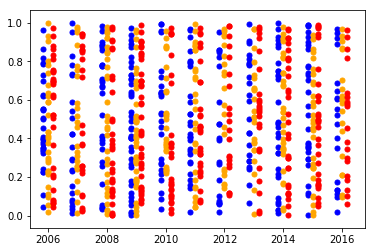

In [3]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import matplotlib.transforms as transforms

year = np.random.choice(np.arange(2006,2017), size=(300) ) 
values = np.random.rand(300, 3)

plt.figure()

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

sc1 = plt.scatter(year, values[:,0], c = 'blue', s = 25, transform=trans+offset(-5))
plt.scatter(year, values[:,1], c = 'orange', s = 25)
plt.scatter(year, values[:,2], c = 'red', s = 25, transform=trans+offset(5))

plt.show()

In [2]:

import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

 
# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
 
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
 
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)